In [1]:
import pandas as pd

In [65]:
sales_data = pd.read_csv('Sales_Data.csv')
glance_view = pd.read_csv("Glance_Views.csv")

In [66]:
sales_data.head()

,Unnamed: 0,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
0,0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.0,0.0,0.0
1,1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.0,0.0,0.0
2,2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.0,0.0,0.0
3,3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.0,0.0,0.0
4,4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.0,0.0,0.0


In [67]:
glance_view.head()

,Unnamed: 0,SKU_NAME,FEED_DATE,VIEWS,UNITS
0,0,B1212:PZ:V,2019-05-01,455.0,16.0
1,1,B1212:PZ:V,2019-05-02,478.0,12.0
2,2,B1212:PZ:V,2019-05-03,681.0,42.0
3,3,B1212:PZ:V,2019-05-04,662.0,70.0
4,4,B1212:PZ:V,2019-05-05,568.0,33.0


### 1.Identify the most expensive SKU, on average, over the entire time period.

### Explanation:

The code calculates the average price per unit for each SKU by dividing the total ordered revenue by the total ordered units, while also handling cases where ordered revenue or units are zero. This calculation provides insights into the average selling price of each SKU, aiding in identifying the most expensive SKU on average over the entire time period.

### Assumption:

The assumption underlying this process is that average price is calculated based on the revenue and units sold. Additionally, in cases where ordered revenue or units are zero, these records are excluded to ensure accurate calculation of average price per SKU, avoiding potential distortion of results. This filtering ensures that only valid data points are considered for identifying the most expensive SKU.


In [68]:
# Calculate average price per SKU, handling cases where ordered revenue or units are zero
non_zero_data = sales_data[(sales_data['ORDERED_REVENUE'] > 0) & (sales_data['ORDERED_UNITS'] > 0)]
non_zero_data['avg_price'] = non_zero_data['ORDERED_REVENUE'] / non_zero_data['ORDERED_UNITS']
non_zero_data.head()

# Find the SKU with the highest average price
most_expensive_sku = non_zero_data.groupby(['SKU_NAME'])['avg_price'].mean().idxmax()

most_expensive_sku


C:\Users\DELL\AppData\Local\Temp\ipykernel_15432\1710087248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_data['avg_price'] = non_zero_data['ORDERED_REVENUE'] / non_zero_data['ORDERED_UNITS']


'C03CBL[721'

### 2.What % of SKUs have generated some revenue in this time period?
 (brownie points - can you identify SKUs that stopped selling completely after July?)
### Explanation:

To calculate the percentage of SKUs that have generated revenue, we first filter the sales data to include only those records where the ordered revenue is greater than 0. This ensures we're considering SKUs that have actually generated revenue. Then, we count the number of unique SKUs in this filtered dataset. Next, we calculate the total number of unique SKUs in the entire dataset. Finally, we divide the number of SKUs with revenue by the total number of SKUs and multiply by 100 to get the percentage.

### Assumption:

The assumption made here is that SKUs with non-zero ordered revenue are considered as having generated revenue. This assumption is based on the understanding that a non-zero revenue indicates actual sales activity for a SKU.


In [69]:
# Calculate the percentage of SKUs with revenue

sales_data['FEED_DATE'] = pd.to_datetime(sales_data['FEED_DATE'])
sales_data['Month'] = sales_data['FEED_DATE'].dt.month

sku_with_revenue = sales_data[sales_data['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()
print(sku_with_revenue)
total_skus = sales_data['SKU_NAME'].nunique()
print(total_skus)
percentage_skus_with_revenue = (sku_with_revenue / total_skus) * 100
print(percentage_skus_with_revenue)

skus_stopped_selling = sales_data[(sales_data['Month'] > 7) & (sales_data['ORDERED_REVENUE'] == 0)]['SKU_NAME'].unique()
print(skus_stopped_selling)


366
465
78.70967741935485
['D12125XVGK' 'C211F62H36' 'C213I5Z84I' 'D211PEL2IE' 'B023PT;UK5'
 'B012GU7SOL' 'B012JWTJDC' 'D214HWSKBO' 'B1255YTFGA' 'B125:PNERK'
 'B004FMWNKW' 'B205J5RPJQ' 'B213K5FIPU' 'C124PR58CZ' 'D224XBK2GB'
 'B203VBOO9C' 'D203VCOPFZ' 'C125OVFDU1' 'B004WQ8HS6' 'D126[CVF9J'
 'C024ZE\\C:9' 'D126DM[TMI' 'B116DUQLEB' 'B207GW2HRZ' 'B007LUCJZW'
 'B029QK5QO4' 'C007RJ6S4B' 'B209T2DTGU' 'D218T1DTFG' 'B10:1TJG86'
 'B11:4F6680' 'D20:5I8Z8W' 'D2097WM9JS' 'D22:1F8F7B' 'B00;3H5XG9'
 'C209:UNGR3' 'C22;9UNFXQ' 'C12;C;8OPZ' 'C22BEDZ:2S' 'B00DHPE[3Z'
 'C11CHPFY5K' 'D02DR5SY3I' 'B10DS5RZI6' 'B10ECKLLFI' 'B12DEKMLLG'
 'B20EKD5JF4' 'B01DQ37D1Q' 'B21DCDJM84' 'D21DDDJLQM' 'D00FT8M7O2'
 'D12ER8NB5R' 'C12E[9ZJSW' 'B21E\\9ZKDH' 'B01F[:YLFY' 'D11I165;6C'
 'C02JAMMO55' 'D21J9KN6Y6' 'D20JUJF[UO' 'C12KPWM3IJ' 'C12L1Z21D4'
 'B12NULIHEQ' 'D10L[VPYJA' 'B00N67CJYG' 'B22OVTXOIY' 'C20MVUXOO4'
 'B21PQ3RNQO' 'B22OZ6\\O1[' 'C00NY7ZPH8' 'C21PIJY9C2' 'D02RL461CX'
 'B01R0I8KFH' 'C01TSH17OH' 'C11ULFE71M' 'C02UYC

### 3. Somewhere in this timeframe, there was a Sale Event. Identify the dates.
### Explanation:

In this code ,we are identifying the date(s) with the maximum number of views in the glance views data. 

1. We group the glance views data by the 'FEED_DATE' column using `.groupby('FEED_DATE')`, which groups the data by each unique date.
2. Then, we sum up the total number of views for each date using `.sum()` on the 'VIEWS' column. This gives us the total views for each date.
3. Next, we use `.idxmax()` to find the index label (i.e., the date) associated with the maximum total views.

### Assumption:

The assumption underlying this process is that the date(s) with the highest number of views in the glance views data correspond to a sale event. This assumption is grounded in the understanding that a significant increase in views likely indicates heightened customer interest, which may be driven by promotional activities or special events such as sales.


In [27]:
# Identify the date(s) with maximum views
sale_event_dates = glance_view.groupby('FEED_DATE')['VIEWS'].sum().idxmax()
sale_event_dates


'2019-07-15'

### 4. (Dependent on 3) Does having a sale event cannibalize sales in the immediate aftermath? Highlighting a few examples would suffice
(brownie points - determine a statistical metric to prove/disprove this).
### Explanation:

In this code, we aim to identify the dates of a sale event within the given timeframe and analyze whether the sale event cannibalized sales in the immediate aftermath.

1. To identify the dates of the sale event, we assume that the sale event lasted for multiple days. We compare sales before, during, and after the event to determine its impact.

2. We calculate total sales before, during, and after the sale event by summing the ordered revenue for the respective periods.

3. Then, we calculate the cannibalization rate, which measures the proportion of sales during the sale event compared to the combined sales before and after the event. This helps us understand if the sale event had a cannibalizing effect on sales immediately before and after its occurrence.

### Assumption:

Cannibalization rate is calculated based on the change in sales volume before, during, and after the sale event.


In [36]:
# Calculate total sales before, during, and after the sale event
before_sales = sales_data[sales_data['FEED_DATE'] < sale_event_dates]['ORDERED_REVENUE'].sum()
during_sales = sales_data[sales_data['FEED_DATE'] == sale_event_dates]['ORDERED_REVENUE'].sum()
after_sales = sales_data[sales_data['FEED_DATE'] > sale_event_dates]['ORDERED_REVENUE'].sum()

# Calculate cannibalization rate
cannibalization_rate = (during_sales / (before_sales + after_sales)) * 100
cannibalization_rate


6.028855988228239

### 5 . In each category, find the subcategory that has grown slowest relative to the category it is present in. If you were handling the entire portfolio, which of these subcategories would you be most concerned with?

### Explanation:

In this code, we aim to calculate the growth rate for each subcategory relative to its category. We then identify the subcategory with the slowest growth rate relative to its category.

1. We calculate the growth rate for each subcategory by using the `pct_change()` function on the 'Ordered_Revenue' column within each group defined by the combination of 'Category' and 'SubCategory'.

2. Next, we find the mean growth rate for each subcategory within its category by grouping the DataFrame by 'Category' and 'SubCategory' and calculating the mean of the growth rates.

3. Finally, we identify the subcategory with the slowest mean growth rate relative to its category using the `idxmin()` function, which returns the index corresponding to the minimum mean growth rate.

### Assumption:

- Growth rate is calculated based on the percentage change in ordered revenue over time.
- Slowest growth rate relative to the category indicates subcategories within each category that are experiencing slower growth compared to others within the same category.
- Concern regarding slow growth is based on the assumption that subcategories with slow growth rates may be facing challenges or underperforming compared to their counterparts within the same category. Addressing these challenges may be important to ensure overall category growth and portfolio performance.


In [40]:
# Calculate growth rate for each subcategory
sales_data['growth_rate'] = sales_data.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].pct_change()
sales_data
# Find the subcategory with the slowest growth rate relative to its category
slowest_growth_subcategory = sales_data.groupby(['CATEGORY', 'SUB_CATEGORY'])['growth_rate'].mean().idxmin()
slowest_growth_subcategory


('0100 Wireless Phones', '0191 Connected Wearables')

### 6. Highlight any anomalies/mismatches in the data that you see, if any. (In terms of data quality issues)
### Explanation:
The provided Python code is designed to identify potential anomalies or mismatches in the data with respect to missing values and the distribution of ordered revenue.

1. **Checking for Missing Values:** The code calculates the number of missing values in each column of the 'Sales Data' table. This helps in identifying any incomplete or inconsistent data entries that may impact the analysis.

2. **Boxplot of Ordered Revenue:** The code generates a boxplot to visualize the distribution of ordered revenue. Boxplots are useful for identifying outliers or extreme values in the data distribution, which could indicate potential anomalies or errors in the data.

### Assumptions:
1. **Missing Values:** The assumption is that missing values, if present, may indicate incomplete or erroneous data entries. It's important to identify and handle missing values appropriately to ensure the accuracy and reliability of the analysis.

2. **Boxplot Analysis:** The assumption is that the distribution of ordered revenue should be relatively consistent, and extreme values identified in the boxplot may represent anomalies or errors in the data. However, it's essential to further investigate these outliers to determine whether they are genuine data points or require further scrutiny and potential correction.


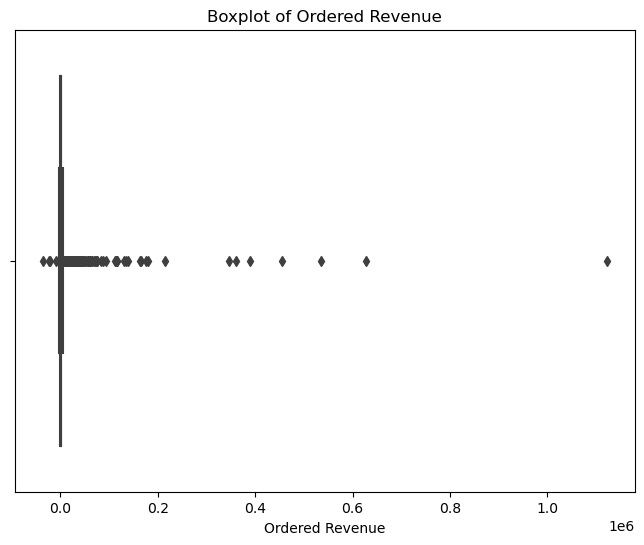

In [64]:

# Boxplot of Ordered_Revenue
plt.figure(figsize=(8, 6))
sns.boxplot(x=sales_data['ORDERED_REVENUE'])
plt.title('Boxplot of Ordered Revenue')
plt.xlabel('Ordered Revenue')
plt.show()


In [63]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Unnamed: 0             0
SKU_NAME               0
FEED_DATE              0
CATEGORY               0
SUB_CATEGORY           0
ORDERED_REVENUE        0
ORDERED_UNITS          0
REP_OOS              689
avg_price          12918
Month                  0
growth_rate        10899
dtype: int64


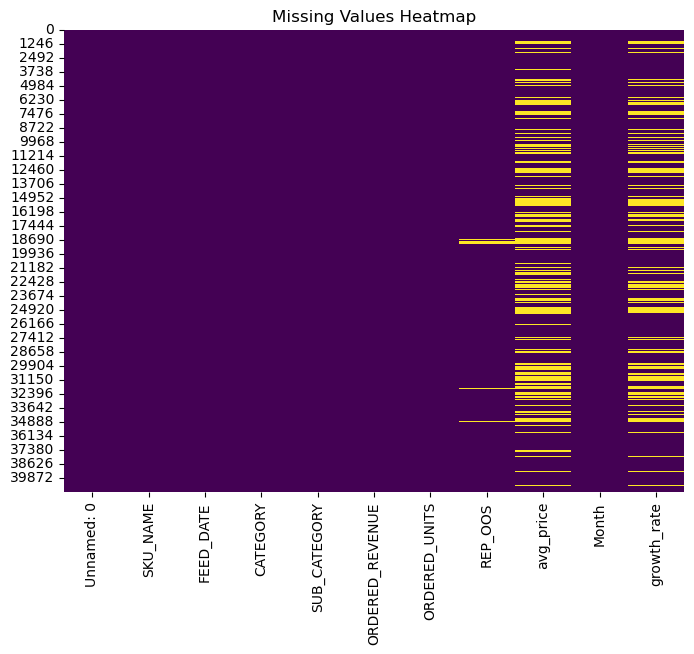

In [60]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sales_data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


### 7. For SKU Name C120[H:8NV, discuss whether Unit Conversion (Units/Views) is affected by Average Selling Price.
### Explanation:
The Python code aims to investigate whether the unit conversion (Units/Views) is affected by the average selling price for SKU C120[H:8NV]. The analysis involves visualizing the relationship between unit conversion and average selling price, calculating the correlation coefficient between these variables, and generating a heatmap to visualize the correlation matrix.

1. **Data Preparation:** The code first ensures that the 'FEED_DATE' column in both the 'Sales Data' and 'Glance View' tables is converted to datetime format and then merges the two tables based on 'SKU_NAME' and 'FEED_DATE'.

2. **Visualizing the Relationship:** After filtering the merged data for SKU C120[H:8NV], the code calculates the unit conversion ratio (Units/Views) and visualizes the relationship between unit conversion and average selling price using a scatterplot. This visualization helps assess whether there's any discernible pattern or trend between the two variables.

3. **Calculating Correlation Coefficient:** The code calculates the correlation coefficient between unit conversion (Units/Views) and average selling price (avg_price) to quantify the strength and direction of their linear relationship. This coefficient provides insights into the degree of association between the two variables.

4. **Generating Correlation Heatmap:** Lastly, the code computes the correlation matrix between 'avg_price' and 'Units/Views' and creates a heatmap to visualize the correlation coefficients. This heatmap helps identify any significant correlations between variables, facilitating a deeper understanding of their relationships.

### Assumption:
The assumption underlying this analysis is that a significant correlation or relationship between unit conversion and average selling price may indicate how changes in pricing affect customer behavior, particularly their propensity to convert views into actual units sold. A positive correlation could suggest that higher average selling prices lead to higher unit conversions, while a negative correlation might indicate the opposite. Additionally, the assumption is made that the data is representative and accurately reflects the relationship between these variables for SKU C120[H:8NV].


In [54]:
sales_data['FEED_DATE'] = pd.to_datetime(sales_data['FEED_DATE'])
glance_view['FEED_DATE'] = pd.to_datetime(sales_data['FEED_DATE'])
merged_data = pd.merge(sales_data, glance_view[['SKU_NAME', 'FEED_DATE', 'VIEWS', 'UNITS']], on=['SKU_NAME', 'FEED_DATE'], how='inner')


In [55]:
merged_data

,Unnamed: 0,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,avg_price,Month,growth_rate,VIEWS,UNITS
0,0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.00,0.0,0.0,NaN,5,NaN,8.0,0.0
1,1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.00,0.0,0.0,NaN,5,NaN,5.0,0.0
2,2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.00,0.0,0.0,NaN,5,NaN,8.0,0.0
3,3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.00,0.0,0.0,NaN,5,NaN,4.0,0.0
4,4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.00,0.0,0.0,NaN,5,NaN,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40421,41110,D29S5IMRDI,2019-08-27,1000 Inputs,1007 Other Input Devices,129.99,1.0,0.0,129.99,8,inf,104.0,1.0
40422,41111,D29S5IMRDI,2019-08-28,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,129.99,8,1.0,108.0,2.0
40423,41112,D29S5IMRDI,2019-08-29,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,129.99,8,0.0,86.0,2.0
40424,41113,D29S5IMRDI,2019-08-30,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,129.99,8,0.0,89.0,2.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15432\3277713621.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Units/Views']=merged_data['UNITS']/merged_data['VIEWS']


<AxesSubplot:xlabel='avg_price', ylabel='Units/Views'>

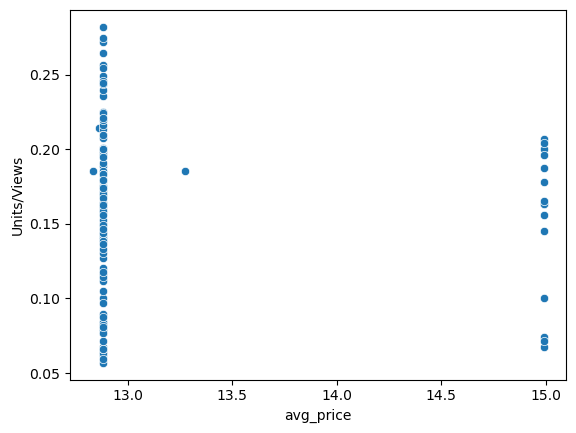

In [57]:
# Visualize the relationship between Unit Conversion and Average Selling Price

import seaborn as sns

# Filter data for SKU C120[H:8NV
merged_data = merged_data[merged_data['SKU_NAME'] == 'C120[H:8NV']
merged_data['Units/Views']=merged_data['UNITS']/merged_data['VIEWS']
# # Visualize the relationship between Unit Conversion and Average Selling Price
sns.scatterplot(x='avg_price', y='Units/Views', data=merged_data)



In [58]:
# Calculate correlation coefficient between Unit Conversion and Average Selling Price
correlation_coefficient = merged_data['avg_price'].corr(merged_data['Units/Views'])
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: -0.029776602675128678


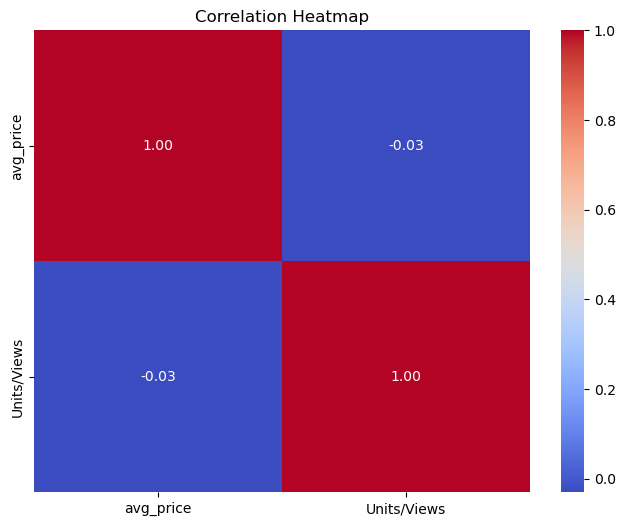

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_data[['avg_price', 'Units/Views']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
